In [38]:
# Import the necessary libraries
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk
import os  
from wordcloud import WordCloud   # for word cloud
from wordcloud import STOPWORDS   # for word cloud
from wordcloud import ImageColorGenerator
from PIL import Image, ImageTk
import ipywidgets
from ipywidgets import widgets
from ipywidgets import interact, interactive, fixed, VBox
from ipywidgets import interact



In [39]:
destDir = './Data/Raw/IGA/'
files = os.listdir(destDir)
files = filter(lambda f: f.endswith(('.txt','.TXT')), files)
# Load the text data from the text documents
documents = []
years = []
for file in files:
    with open(destDir + file, "r" , encoding="utf-8") as f:
        text = f.read()
        documents.append(text)
        # Extract the year from the file name
        year = int(file.split("_")[-1].split(".")[0])
        years.append(year)
# Pre-process the text data
for i in range(len(documents)):
    documents[i] = documents[i].lower() # Convert to lowercase
    documents[i] = documents[i].replace(".", "") # Remove punctuation
    

In [40]:
# Create a word cloud for each year
wordClouds = {}
for i in range(len(documents)):
    wordClouds[years[i]] = WordCloud(stopwords=STOPWORDS, background_color='white', width=1200, height=1000).generate(documents[i])

In [41]:
def showWordCloud(yr):
    # Show the word cloud
    plt.imshow(wordClouds[yr], interpolation="bilinear")
    plt.axis("off")
    yrs = str(yr)
    plt.savefig('./Images/' + yrs + '.png')

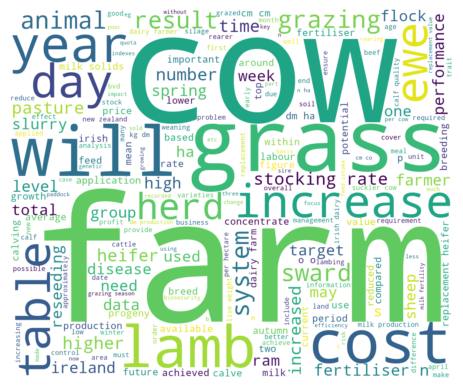

In [42]:
for y in years:
    # Create the word cloud
    showWordCloud(y)

In [43]:
# define function to load image
def load_image(year):
    # load image
    load = Image.open("./Images/" + year + ".png")
    # resize image
    try:
        load = load.resize((1000, 1000), Image.ANTIALIAS)
        # create image
        render = ImageTk.PhotoImage(load)
        # create label
        label = tk.Label(image=render)
        label.image = render
        label.place(x=100, y=100)
        #label.pack()
    except:
        pass

In [44]:
#window = mainWindow()
window = tk.Tk()
window.geometry("1400x1200")
window.title("Word Cloud Slider")



# Create the slider widget
tkInt = (years[len(years) - 1] - years[0]/len(years))
slider = tk.Scale(window, from_=years[0], to=years[len(years) - 1], orient=tk.HORIZONTAL, tickinterval=tkInt, resolution=1, length=500,  command=load_image)
label = tk.Label(window, text="Word Cloud of the Year", font=("Arial", 20))

slider.pack()
label.pack()
   
# Run the tkinter event loop
vbox = VBox([window.mainloop()])

vbox


Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\ProgramData\Anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\stehayes\AppData\Local\Temp\ipykernel_15208\2284794932.py", line 4, in load_image
    load = Image.open("./Images/" + year + ".png")
  File "C:\Users\stehayes\AppData\Roaming\Python\Python39\site-packages\PIL\Image.py", line 3131, in open
    fp = builtins.open(filename, "rb")
FileNotFoundError: [Errno 2] No such file or directory: './Images/1963.png'
Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\ProgramData\Anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\stehayes\AppData\Local\Temp\ipykernel_15208\2284794932.py", line 4, in load_image
    load = Image.open("./Images/" + year + ".png")
  File "C:\Users\stehayes\AppData\Roaming\Python\Python39\site-packages\PIL\Image.py", line 3131, in open
    fp = builtins.open(

TraitError: The 'children' trait of a VBox instance contains an Instance of a TypedTuple which expected a Widget, not the NoneType None.